In [ ]:
!pip install pyarrow

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving clean_data.parquet to clean_data (1).parquet


In [ ]:
import pandas as pd

df = pd.read_parquet('clean_data.parquet', engine='pyarrow')
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2019-12-18 15:52:30,2019-12-18 15:54:39,N,1.0,264,264,5.0,0.00,3.5,0.50,0.5,0.01,0.0,0.3,4.81,1.0,1.0,0.00
1,2,2020-01-01 00:45:58,2020-01-01 00:56:39,N,5.0,66,65,2.0,1.28,20.0,0.00,0.0,4.06,0.0,0.3,24.36,1.0,2.0,0.00
2,2,2020-01-01 00:41:38,2020-01-01 00:52:49,N,1.0,181,228,1.0,2.47,10.5,0.50,0.5,3.54,0.0,0.3,15.34,1.0,1.0,0.00
3,1,2020-01-01 00:52:46,2020-01-01 01:14:21,N,1.0,129,263,2.0,6.30,21.0,3.25,0.5,0.00,0.0,0.3,25.05,2.0,1.0,2.75
4,1,2020-01-01 00:19:57,2020-01-01 00:30:56,N,1.0,210,150,1.0,2.30,10.0,0.50,0.5,0.00,0.0,0.3,11.30,1.0,1.0,0.00


In [ ]:
print(f'Total rows: {df.shape[0]}')
print(f'Total columns: {df.shape[1]}')

Total rows: 3876894
Total columns: 19


In [ ]:
numerical_df = df.select_dtypes(include=['number'])

mean_values = numerical_df.mean()
median_values = numerical_df.median()
mode_values = numerical_df.mode().iloc[0]

print("Mean Values:")
print(mean_values)
print("\nMedian Values:")
print(median_values)
print("\nMode Values:")
print(mode_values)

Mean Values:
VendorID                   1.845679
RatecodeID                 1.167289
PULocationID              99.305639
DOLocationID             135.669466
passenger_count            1.291475
trip_distance              3.265491
fare_amount               15.221848
extra                      0.573812
mta_tax                    0.519278
tip_amount                 1.744677
tolls_amount               0.224583
improvement_surcharge      0.522669
total_amount              19.334775
payment_type               1.392982
trip_type                  1.036631
congestion_surcharge       0.653107
dtype: float64

Median Values:
VendorID                   2.00
RatecodeID                 1.00
PULocationID              75.00
DOLocationID             135.00
passenger_count            1.00
trip_distance              1.83
fare_amount               11.00
extra                      0.00
mta_tax                    0.50
tip_amount                 1.00
tolls_amount               0.00
improvement_surcharge      0

In [ ]:
summary_df = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values
})

print(summary_df)

                             Mean  Median  Mode
VendorID                 1.845679    2.00   2.0
RatecodeID               1.167289    1.00   1.0
PULocationID            99.305639   75.00  74.0
DOLocationID           135.669466  135.00  74.0
passenger_count          1.291475    1.00   1.0
trip_distance            3.265491    1.83   0.0
fare_amount             15.221848   11.00   6.5
extra                    0.573812    0.00   0.0
mta_tax                  0.519278    0.50   0.5
tip_amount               1.744677    1.00   0.0
tolls_amount             0.224583    0.00   0.0
improvement_surcharge    0.522669    0.30   0.3
total_amount            19.334775   14.95   7.3
payment_type             1.392982    1.00   1.0
trip_type                1.036631    1.00   1.0
congestion_surcharge     0.653107    0.00   0.0


In [ ]:
sorted_summary_df = summary_df.sort_values(by='Mean')

print(sorted_summary_df)

                             Mean  Median  Mode
tolls_amount             0.224583    0.00   0.0
mta_tax                  0.519278    0.50   0.5
improvement_surcharge    0.522669    0.30   0.3
extra                    0.573812    0.00   0.0
congestion_surcharge     0.653107    0.00   0.0
trip_type                1.036631    1.00   1.0
RatecodeID               1.167289    1.00   1.0
passenger_count          1.291475    1.00   1.0
payment_type             1.392982    1.00   1.0
tip_amount               1.744677    1.00   0.0
VendorID                 1.845679    2.00   2.0
trip_distance            3.265491    1.83   0.0
fare_amount             15.221848   11.00   6.5
total_amount            19.334775   14.95   7.3
PULocationID            99.305639   75.00  74.0
DOLocationID           135.669466  135.00  74.0


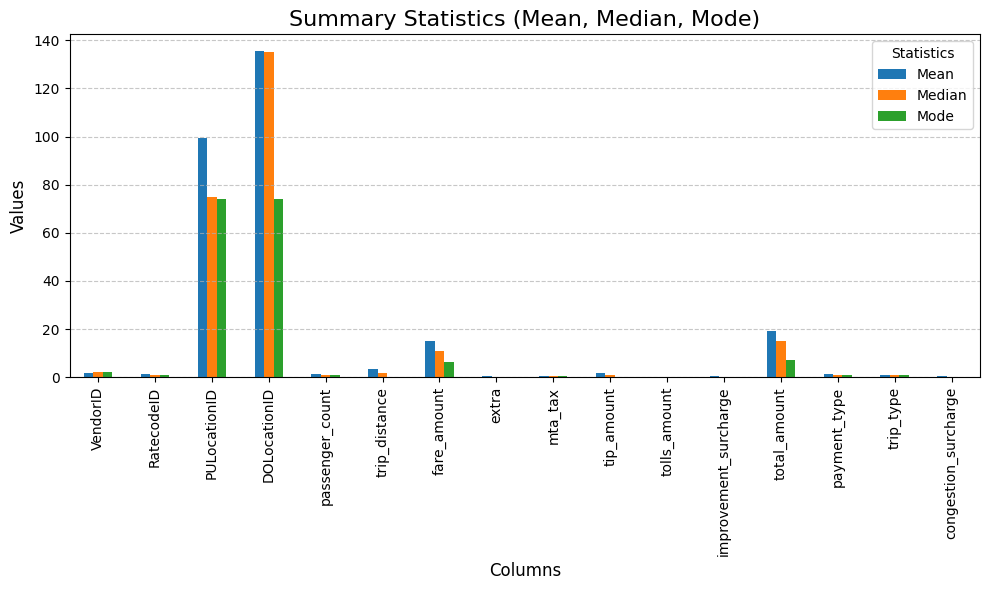

In [ ]:
import matplotlib.pyplot as plt

summary_df.plot(kind='bar', figsize=(10, 6))

plt.title('Summary Statistics (Mean, Median, Mode)', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.legend(title='Statistics', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [ ]:
print("\nColumn Names and Data Types:\n")
for col, dtype in df.dtypes.items():
    print(f"{col}: {dtype}")


Column Names and Data Types:

VendorID: int64
lpep_pickup_datetime: datetime64[ns]
lpep_dropoff_datetime: datetime64[ns]
store_and_fwd_flag: object
RatecodeID: float64
PULocationID: int64
DOLocationID: int64
passenger_count: float64
trip_distance: float64
fare_amount: float64
extra: float64
mta_tax: float64
tip_amount: float64
tolls_amount: float64
improvement_surcharge: float64
total_amount: float64
payment_type: float64
trip_type: float64
congestion_surcharge: float64
